digits.target------ :  [0 1 2 ... 8 9 8]
len(images_and_labels) 1797
index:  0 image:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]  label :  0
index:  1 image:
 [[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]  label :  1
index:  2 image:
 [[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]  label :  

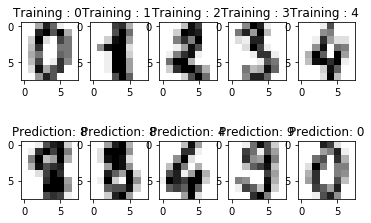

x_testData : 
 [0.0, 0.0, 2.0, 7.0, 11.0, 12.0, 6.0, 0.0, 0.0, 2.0, 12.0, 11.0, 6.0, 7.0, 14.0, 3.0, 0.0, 1.0, 3.0, 1.0, 0.0, 1.0, 12.0, 5.0, 0.0, 1.0, 1.0, 6.0, 7.0, 5.0, 14.0, 3.0, 0.0, 7.0, 7.0, 5.0, 15.0, 16.0, 12.0, 1.0, 0.0, 9.0, 8.0, 1.0, 3.0, 4.0, 13.0, 5.0, 0.0, 8.0, 11.0, 3.0, 3.0, 4.0, 12.0, 7.0, 0.0, 3.0, 13.0, 14.0, 14.0, 14.0, 11.0, 2.0]
len(x_testData) : 64
len(x_testData) : 1
Machine Output=: [3]


In [59]:
# Digit Recognition

import warnings
warnings.filterwarnings("ignore")

#Standard scientific Python import
import matplotlib.pyplot as plt

#Import dataset, classifiers and performance metrics
from sklearn import datasets,svm

#The digits dataset
digits = datasets.load_digits()

#print("digits : ", digits.keys())

print("digits.target------ : ", digits.target)

images_and_labels = list(zip(digits.images,digits.target)) 
print("len(images_and_labels)", len(images_and_labels))

for index, [image,label] in enumerate(images_and_labels[: 5] ):
    print("index: ",index,"image:\n",image, " label : ", label)
    plt.subplot(2,5,index+1) #Position numbering starts from 1
    plt.axis('on')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training : %i '%label)
#plt.show()

#To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples,feture) matrix:
n_samples = len(digits.images) #n_samples=1797
print("n_samples : ",n_samples)

imageData = digits.images.reshape((n_samples,-1))
print("After Reshaped : len(imageData[0])",len(imageData[0]))

#Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of digits
classifier.fit( imageData[:n_samples//2],digits.target[:n_samples//2])

#Now pridect the value of the digit on the second half:
originalY=digits.target[n_samples//2:]
predictedY = classifier.predict(imageData[n_samples//2: ])

images_and_predictions = list(zip(digits.images[n_samples//2: ],predictedY))

for index, [image, prediction ] in enumerate(images_and_predictions[:5]):
    plt.subplot(2,5,index+6)
    plt.axis('on')
    plt.imshow(image,cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' %prediction)
    
print("Original Values: ",digits.target[n_samples //2 :(n_samples//2)+5]) 
plt.show()


#Install Pillow library
# from scipy.misc import imread,imresize, bytescale
from sklearn.externals._pilutil import imresize, bytescale, imread

img=imread('/home/diwakar/Downloads/IITK ML Data/Three2.jpeg')
img=resize(img,(8,8))
classifier=svm.SVC(gamma=0.001)
classifier.fit(imageData[:],digits.target[:])

img=img.astype(digits.images.dtype)
img=bytescale(img, high=16.0,low=0)

x_testData=[]
for row in img:
    for col in row:
        x_testData.append(sum(col)/3.0)

print("x_testData : \n",x_testData)

print("len(x_testData) :",len(x_testData))

x_testData=[x_testData]
print("len(x_testData) :",len(x_testData))

result =classifier.predict(x_testData)
print("Machine Output=:",result)

plt.show()




digits :  dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
digits.target---- :  [0 1 2 ... 8 9 8]
len(images_and_labels)  1797
index :  0 image : 
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]  label :  0
index :  1 image : 
 [[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]  label :  1
index :  2 image : 
 [[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.

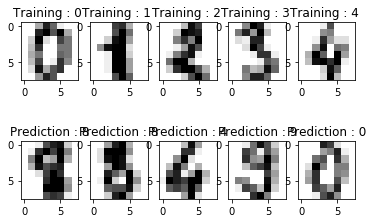

In [61]:
# Standard scientific Python import
import matplotlib.pyplot as plt
# import dataset, classifier and performance matrix
from sklearn import datasets, svm
import warnings

from sklearn.externals._pilutil import imresize, bytescale, imread

warnings.filterwarnings(action='ignore')

# The digits dataset, images are of 8*8 dimensions in this data set present in sklearn datasets
digits = datasets.load_digits()

print("digits : ", digits.keys())

print("digits.target---- : ", digits.target)

images_and_labels = list(zip(digits.images, digits.target))

print("len(images_and_labels) ", len(images_and_labels))

# for binding 1st five rows with index
for index, [image, label] in enumerate(images_and_labels[:5]):
    print("index : ", index, "image : \n", image, " label : ", label)
    plt.subplot(2, 5, index+1)
    plt.axis('on')
    # interpolation not required in new versions
    # for images, cmap for gray scale conversion, interpolation for smooth boundary
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training : %i ' % label)

# plt.show()

# images and targets from data set headings
n_samples = len(digits.images)
print("n_samples : ", n_samples)

# for changing dimension of images for using in model, -1 for reducing one dimension
imageData = digits.images.reshape((n_samples, -1))

# number of columns in a row, after reshaped
print("After Reshaped : len(imageData[0] ) ", len(imageData[0]))

# gamma is learning rate, and loading code of svm
classifier = svm.SVC(gamma=0.001)

# 50% data used for training
classifier.fit(imageData[: n_samples//2], digits.target[: n_samples//2])

# original target of images after 50% data
originalY = digits.target[n_samples//2:]

# testing model with last 50% data
predictedY = classifier.predict(imageData[n_samples//2:])

# combining images and their predicted target
images_and_predictions = list(zip(digits.images[n_samples//2:], predictedY))

# plotting 1st five images and their predicted target
for index, [image, prediction] in enumerate(images_and_predictions[:5]):
    plt.subplot(2, 5, index+6) # dividing plotting space into 2 rows and 5 column, and plotting graph in 2nd row
    plt.axis('on') # ticks
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction : %i' % prediction)

# original target values of images plotted in graph
print("Original Values: ", digits.target[n_samples//2: (n_samples//2)+5])
# plt.show()

# from scipy.misc import imread, imresize, bytescale
# from matplotlib.pyplot import imread

img = imread("/home/diwakar/Downloads/IITK ML Data/FourC.jpeg")
# resizing images to required dimension
img = imresize(img, (8, 8))

classifier = svm.SVC(gamma=0.001)
classifier.fit(imageData[:], digits.target[:])

# making type of images same as earlier(data set of sklearn)
img = img.astype(digits.images.dtype)
img = bytescale(img, high=16.0, low=0)

print("img.shape : ", img.shape)
print("\n", img)

x_testData = []

for row in img:
    for col in row:
        x_testData.append(sum(col)/3.0)
        # for converting RGB to gray and to required format to process image

print("x_testData : \n", x_testData)

print("len(x_testData): ", len(x_testData))

x_testData = [x_testData]
print("len(x_testData) : ", len(x_testData))

result = classifier.predict(x_testData)
print("Machine Output = ", result)

plt.show()